In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from itertools import product 
from pywt import central_frequency
from numpy.fft import rfft, rfftfreq


In [62]:
dataset = pd.read_pickle('../data/prepared_data/train_1_fi.pkl')
# dataset_2 = pd.read_pickle('../data/prepared_data/train_2_fi.pkl')

In [63]:
dataset.shape

(54000, 8)

# Overview wavelets

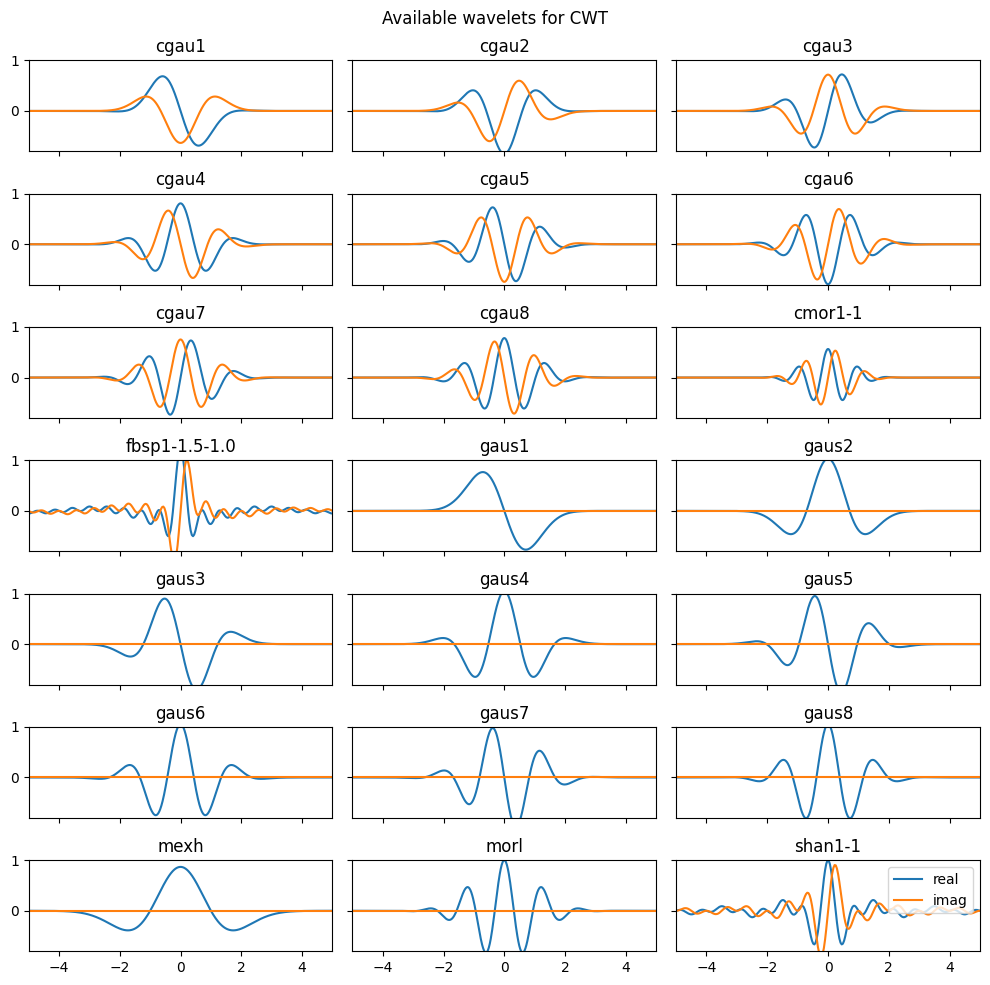

In [48]:
wavlist = pywt.wavelist(kind="continuous")
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.show()

# Wavelet list

In [49]:
wavelist = pywt.wavelist(kind='continuous')
print(wavelist)

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


# Explore wavelet params

In [50]:
wavelet = pywt.ContinuousWavelet('cgau3')
wavelet.bandwidth_frequency, wavelet.center_frequency

(None, None)

In [51]:
wavelet = pywt.ContinuousWavelet('cmor12242-1000')
wavelet.bandwidth_frequency, wavelet.center_frequency

(12242.0, 1000.0)

In [52]:
wavelet = pywt.ContinuousWavelet('gaus5')
wavelet.bandwidth_frequency, wavelet.center_frequency

(None, None)

In [53]:
wavelet = pywt.ContinuousWavelet('shan1.5-1.5')
wavelet.bandwidth_frequency, wavelet.center_frequency

(1.5, 1.5)

# Central and bandwidth frequency 

In [54]:
wavelet_type = 'fbsp1-'
bandwidth_frequency = 2
central_frequency = 2

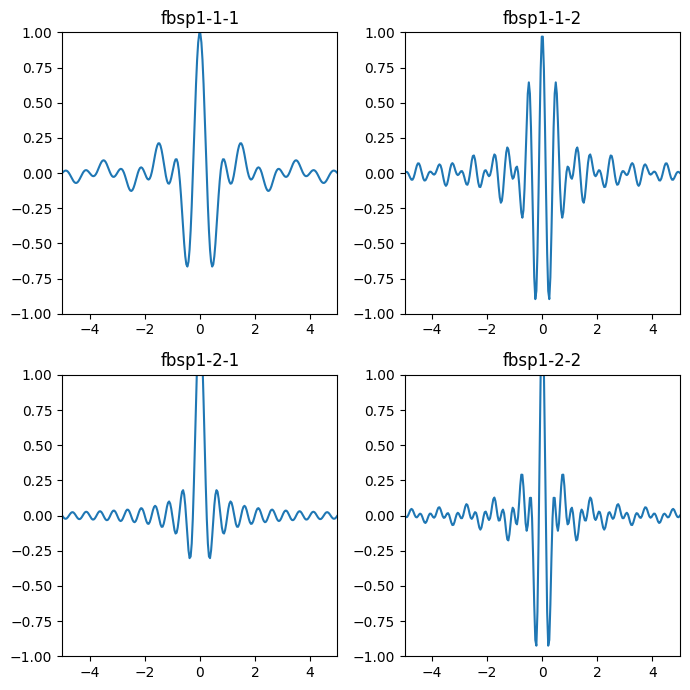

In [55]:
wavlist_coef = product([1, central_frequency],
                  [1, bandwidth_frequency])
wavlist = [f'{wavelet_type}{bandwidth_frequency}-{center_frequency}' for bandwidth_frequency, center_frequency in wavlist_coef]
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    # ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-1, 1])

# ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Different wavelets

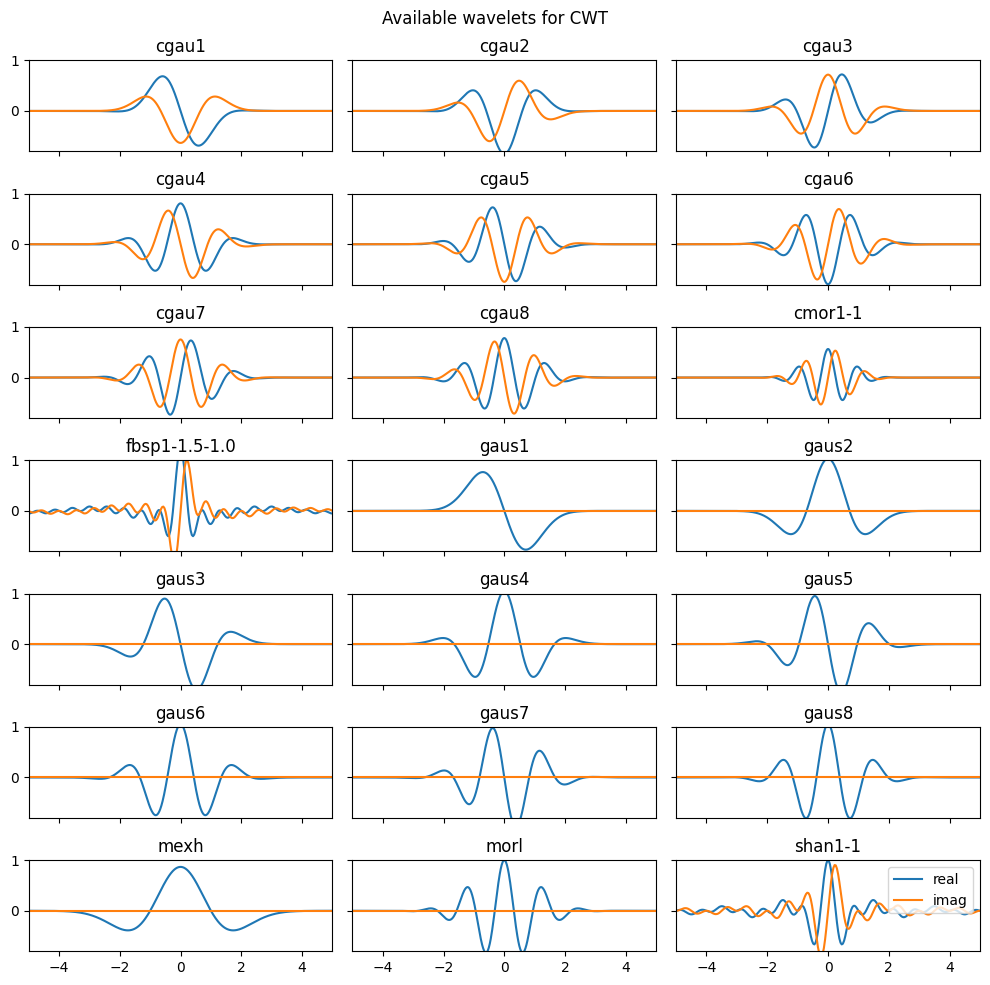

In [56]:
import matplotlib.pyplot as plt
import numpy as np

import pywt

wavlist = pywt.wavelist(kind="continuous")
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.show()

# Apply wavelet

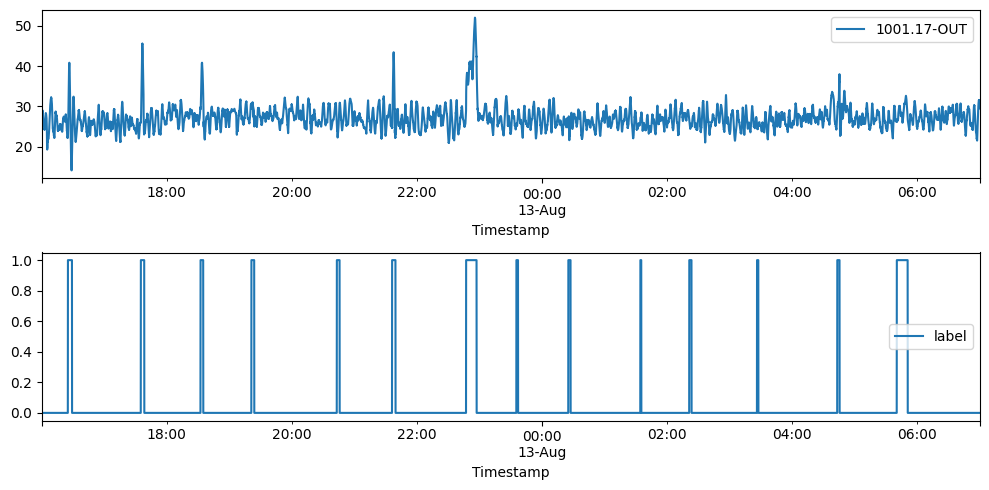

In [89]:
time = dataset['Timestamp']
signal = dataset[['1001.17-OUT', 'Timestamp', 'label']]

# plot signal
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
signal.plot("Timestamp", "1001.17-OUT", ax=axs[0])
signal.plot("Timestamp", "label", ax=axs[1])
fig.tight_layout();

In [90]:
dataset.head()

,DM-FT03,1001.16-OUT,1001.17-OUT,DM-PCV02-Z,DM-FCV03-D,DM-FCV02-D,label,Timestamp
0,237.693771,26.214691,26.214691,11.689758,50.534317,15.0,0,2022-08-12 16:00:01
1,237.503006,26.251205,26.251205,11.697387,50.505592,15.0,0,2022-08-12 16:00:02
2,237.693771,26.291470,26.291470,11.689758,50.528187,15.0,0,2022-08-12 16:00:03
3,237.884476,26.344532,26.344532,11.689758,50.515984,15.0,0,2022-08-12 16:00:04
4,238.456741,26.400236,26.400236,11.697387,50.502048,15.0,0,2022-08-12 16:00:05


In [123]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(signal['1001.17-OUT'], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

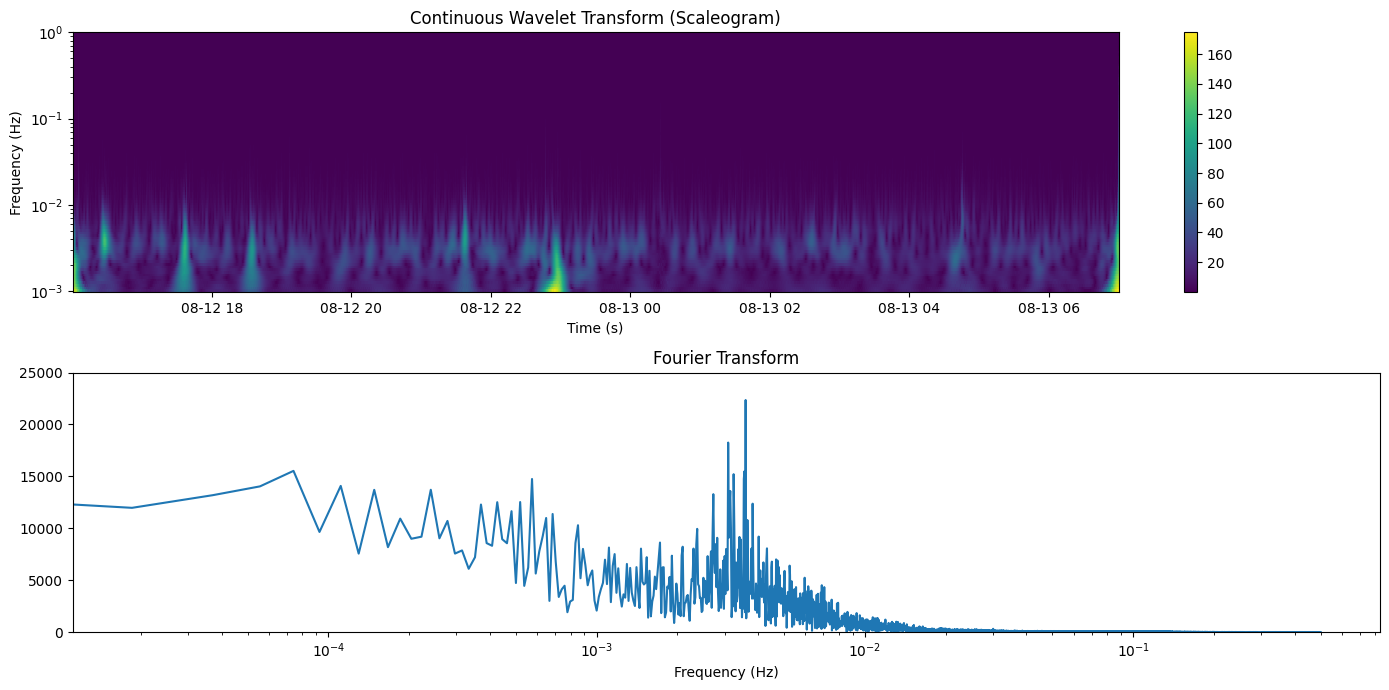

In [124]:
# plot result using matplotlib's pcolormesh (image with annoted axes)
fig, axs = plt.subplots(2, 1, figsize=(14, 7))
pcm = axs[0].pcolormesh(time, freqs, cwtmatr)
axs[0].set_yscale("log")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Frequency (Hz)")
axs[0].set_title("Continuous Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs[0])

# plot fourier transform for comparison

yf = rfft(signal['1001.17-OUT'])
xf = rfftfreq(len(signal['1001.17-OUT']), sampling_period)

plt.semilogx(xf, np.abs(yf))
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_title("Fourier Transform")
axs[1].set_ylim((0, 2.5e4))
plt.tight_layout()